In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [4]:
model = ChatGoogleGenerativeAI(
    model='gemini-2.5-flash',
    temperature=0.7,
)

In [5]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [6]:
def generate_joke(state: JokeState):
    topic = state['topic']
    prompt = f"Tell me a joke about {topic} in less than 30 words."
    joke = model.invoke(prompt).content
    return {'joke': joke}

def explain_joke(state: JokeState):
    joke = state['joke']
    prompt = f"Explain the following joke in less than 50 words: {joke}"
    explanation = model.invoke(prompt).content
    return {'explanation': explanation}

In [7]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('explain_joke', explain_joke)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'explain_joke')
graph.add_edge('explain_joke', END)

checkpoint = InMemorySaver()
app = graph.compile(checkpointer=checkpoint)

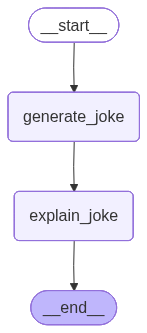

In [8]:
app

In [9]:
thread_id = '1'
config = {'configurable': {'thread_id': thread_id}}

res = app.invoke({'topic': 'indian railways'}, config=config)

In [10]:
print(res)

{'topic': 'indian railways', 'joke': 'Why did the Indian train bring a calendar? It wanted to mark all the days it was *supposed* to arrive.', 'explanation': 'Indian trains are notorious for significant delays. The joke humorously suggests the train needs a calendar to record the many different dates it *failed* to arrive on schedule, highlighting its unreliability rather than its punctuality.'}


In [12]:
print(app.get_state(config))

StateSnapshot(values={'topic': 'indian railways', 'joke': 'Why did the Indian train bring a calendar? It wanted to mark all the days it was *supposed* to arrive.', 'explanation': 'Indian trains are notorious for significant delays. The joke humorously suggests the train needs a calendar to record the many different dates it *failed* to arrive on schedule, highlighting its unreliability rather than its punctuality.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f093879-52b4-6e17-8002-301ed3ce8389'}}, metadata={'source': 'loop', 'writes': {'explain_joke': {'explanation': 'Indian trains are notorious for significant delays. The joke humorously suggests the train needs a calendar to record the many different dates it *failed* to arrive on schedule, highlighting its unreliability rather than its punctuality.'}}, 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-09-17T05:31:38.099663+00:00', parent_config={'configurable': {'thread_i

In [13]:
list(app.get_state_history(config))

[StateSnapshot(values={'topic': 'indian railways', 'joke': 'Why did the Indian train bring a calendar? It wanted to mark all the days it was *supposed* to arrive.', 'explanation': 'Indian trains are notorious for significant delays. The joke humorously suggests the train needs a calendar to record the many different dates it *failed* to arrive on schedule, highlighting its unreliability rather than its punctuality.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f093879-52b4-6e17-8002-301ed3ce8389'}}, metadata={'source': 'loop', 'writes': {'explain_joke': {'explanation': 'Indian trains are notorious for significant delays. The joke humorously suggests the train needs a calendar to record the many different dates it *failed* to arrive on schedule, highlighting its unreliability rather than its punctuality.'}}, 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-09-17T05:31:38.099663+00:00', parent_config={'configurable': {'thread_